In [1]:
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_xgb_cv_predict,plot_roc,my_xgb_fit_predict

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


### Load train and test data

In [2]:
X_train,y_train,X_test,y_test=load_data(hla_representation='one-hot',
                                        species_representation='one-hot',
                                        seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 7.96708106995 s


----


### Cross Validate on training data


In [5]:
#model params
params = {'max_depth':20,
         'eta':0.1,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,X_train,y_train,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.781961	eval-auc:0.773729
[500]	train-auc:0.986792	eval-auc:0.930920
[1000]	train-auc:0.994603	eval-auc:0.932368
Stopping. Best iteration:
[1262]	train-auc:0.996479	eval-auc:0.932549

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.775555	eval-auc:0.757674
[500]	train-auc:0.987352	eval-auc:0.928968
[1000]	train-auc:0.994954	eval-auc:0.929691
Stopping. Best iteration:
[868]	train-auc:0.993710	eval-auc:0.929979

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.783212	eval-auc:0.768799
[500]	train-auc:0.986531	eval-auc:0.927943
[1000]	train-auc:0.994477	eval-auc:0.929792
Stopping. Best iteration:
[1086]	train-auc:0.995216	eval-auc:0.929833

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.775720	eval-auc:0.758307
[500]	train-auc:0.986864	eval-auc:0.924813
[1000]	train-auc:0.994740	eval-auc:0.927770
Stopping. Best iteration:
[971]	trai

----
### Evaluate


AUC: 0.92833521295


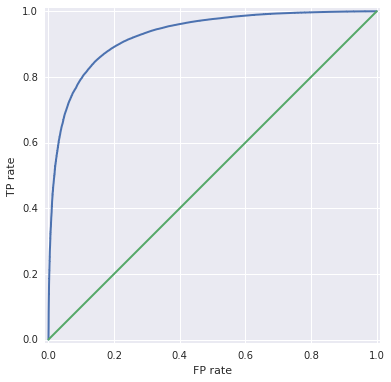

In [6]:
plot_roc(y_train,y_pred)

----
### Predict blind data

In [7]:
y_test_pred=my_xgb_fit_predict(params,X_train,y_train,X_test,
                       num_boost_round=5000,verbose_eval=500,
                       early_stopping_rounds=200,
                       validation_size=0.1)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.779555	eval-auc:0.759619
[500]	train-auc:0.985793	eval-auc:0.932019
[1000]	train-auc:0.993809	eval-auc:0.934673
[1500]	train-auc:0.996789	eval-auc:0.934990
Stopping. Best iteration:
[1349]	train-auc:0.996103	eval-auc:0.935145



AUC: 0.905769201596


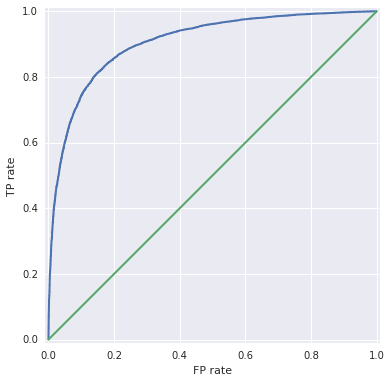

In [8]:
plot_roc(y_test,y_test_pred)

---

### Conclusion: passed 'state of the art'

Method | CV | Blind test
--- | --- | ---
SMMPMBEC | 0.8989 | 0.8474
NetMHC | 0.8930 | 0.8833
NetMHCpan |0.9176 | 0.8830
xgboost |**0.9283** | **0.9057**


---
